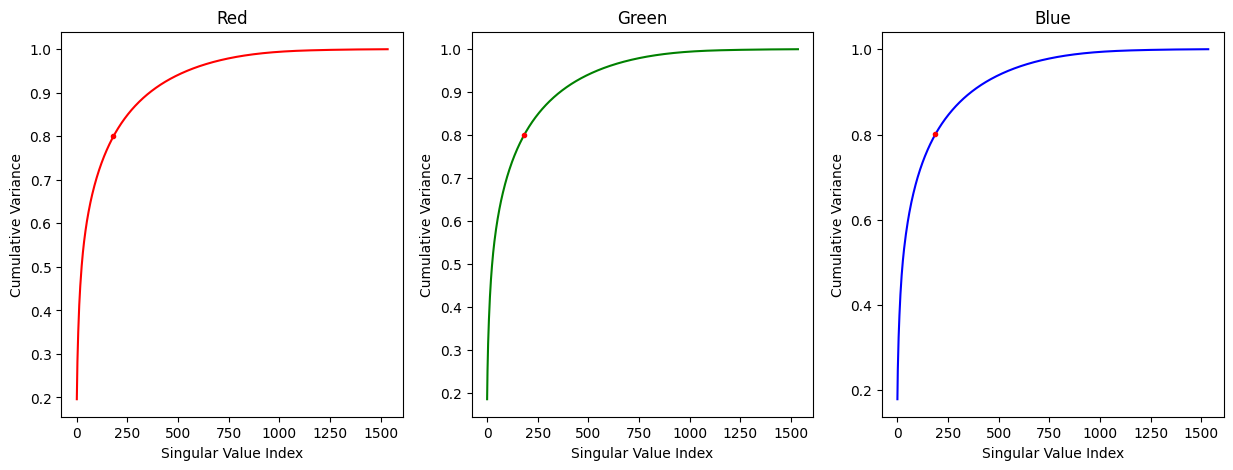

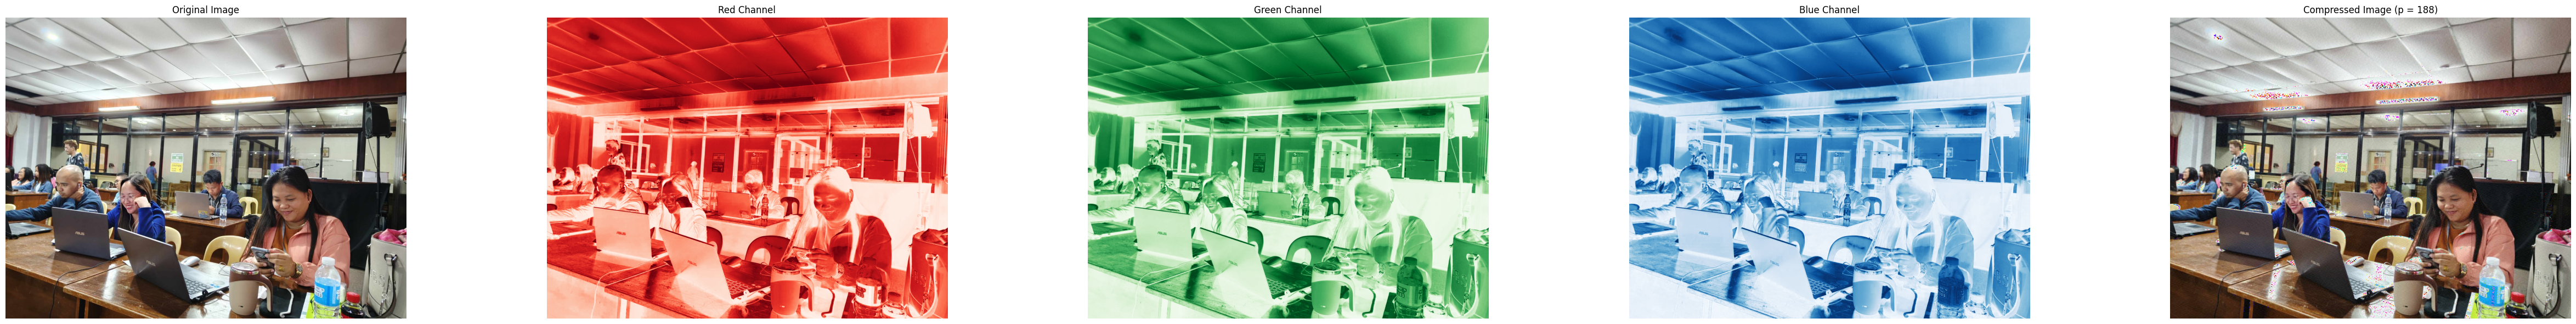

p (Red channel): 182
p (Green channel): 184
p (Blue channel): 188
Max p used for reconstruction: 188


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Img = cv2.imread("py.jpg", cv2.IMREAD_COLOR)

Img_rgb = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

R, G, B = Img[:, :, 2], Img[:, :, 1], Img[:, :, 0]

U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

def find_p(S, threshold=0.8):
    ImgVar = np.cumsum(S) / np.sum(S)
    p = np.argmax(ImgVar >= threshold) + 1
    return p, ImgVar

p_R, ImgVar_R = find_p(S_R)
p_G, ImgVar_G = find_p(S_G)
p_B, ImgVar_B = find_p(S_B)

p_max = max(p_R, p_G, p_B)

def reconstruct_image(U, S, Vt, p):
    return np.dot(U[:, :p], np.dot(np.diag(S[:p]), Vt[:p, :]))

R_compressed = reconstruct_image(U_R, S_R, Vt_R, p_max)
G_compressed = reconstruct_image(U_G, S_G, Vt_G, p_max)
B_compressed = reconstruct_image(U_B, S_B, Vt_B, p_max)

CompressedImg = np.stack([R_compressed, G_compressed, B_compressed], axis=2).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, ImgVar, p, color, title in zip(
    axes, [ImgVar_R, ImgVar_G, ImgVar_B], [p_R, p_G, p_B], ['r', 'g', 'b'], ["Red", "Green", "Blue"]
):
    ax.plot(ImgVar, color)
    ax.plot(p - 1, ImgVar[p - 1], 'r.')
    ax.set_title(f"{title}")
    ax.set_xlabel("Singular Value Index")
    ax.set_ylabel("Cumulative Variance")

plt.show()

fig, ax = plt.subplots(1, 5, figsize=(50, 6))
ax[0].imshow(Img_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(R, cmap="Reds")
ax[1].set_title("Red Channel")
ax[1].axis("off")

ax[2].imshow(G, cmap="Greens")
ax[2].set_title("Green Channel")
ax[2].axis("off")

ax[3].imshow(B, cmap="Blues")
ax[3].set_title("Blue Channel")
ax[3].axis("off")

ax[4].imshow(CompressedImg)
ax[4].set_title(f"Compressed Image (p = {p_max})")
ax[4].axis("off")

plt.tight_layout()
plt.show()

print(f"p (Red channel): {p_R}")
print(f"p (Green channel): {p_G}")
print(f"p (Blue channel): {p_B}")
print(f"Max p used for reconstruction: {p_max}")
